# 1. **Introduction**
In this, we will be analyzing a cardiovascular disease dataset to predict the presence or absence of cardiovascular disease based on various medical factors. We will be using several machine learning models to make these predictions and evaluate their performance.

# Importing Libraries

In [1]:
import time

# Start time
start_time = time.time()



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model libraries
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE

# Feature Extraction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Imbalanced data
# from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Load Data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data_for_mini_project/cardio_train.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.shape # no.of instances and no.of features

(70000, 13)

In [8]:
data.duplicated().sum() # no. of duplicates present in dataset

0

In [9]:
data.info() # null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
data.describe().T # statistical analysis

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [11]:
data.isnull().sum() # null values in dataset

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [12]:
data.nunique() #no. of unique values

,0
id,70000
age,8076
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


In [13]:
data.dtypes # data types

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [14]:
data.columns #columns in dataset

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [15]:

# Explanation of each column in the dataset:

# 1. id:
#    - A unique identifier for each patient in the dataset.

# 2. age:
#    - Age of the patient in days.

# 3. gender:
#    - Gender of the patient (1 = female, 2 = male).

# 4. height:
#    - Height of the patient in centimeters.

# 5. weight:
#    - Weight of the patient in kilograms.

# 6. ap_hi:
#    - Systolic blood pressure (higher number) in mmHg.

# 7. ap_lo:
#    - Diastolic blood pressure (lower number) in mmHg.

# 8. cholesterol:
#    - Cholesterol levels (1 = normal, 2 = above normal, 3 = well above normal).

# 9. gluc:
#    - Glucose levels (1 = normal, 2 = above normal, 3 = well above normal).

# 10. smoke:
#     - Whether the patient smokes or not (0 = No, 1 = Yes).

# 11. alco:
#     - Whether the patient drinks alcohol or not (0 = No, 1 = Yes).

# 12. active:
#     - Whether the patient is physically active or not (0 = No, 1 = Yes).

# 13. cardio:
#     - Presence or absence of cardiovascular disease (0 = Absent, 1 = Present). This is the target variable we aim to predict.

#  Handling Missing values

In [16]:
# unknown is considered as missing values
def is_unknown(value):
    return value == 'unknown'

unknown_counts = data.applymap(is_unknown).sum()
print(unknown_counts)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [17]:
#percentage of unknowns present 9
unknown_percentages = (data.applymap(is_unknown).sum() / len(data)) * 100

print(unknown_percentages)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


In [18]:
data.groupby('gender')['height'].mean()

,height
gender,
1,161.355612
2,169.947895



The code `data.groupby('gender')['height'].mean()` calculates the average height for each gender in the dataset.

Here's a breakdown:

1. **`data.groupby('gender')`:** This part groups the data based on the 'gender' column. It creates separate groups for each unique gender value (1 and 2, typically representing female and male).

2. **`['height']`:**  This selects the 'height' column from each group.

3. **`.mean()`:** This calculates the mean (average) height within each gender group.

**In essence, the output will be a table or series showing the average height of females and males separately.** This helps you understand if there is any significant difference in average height between the genders in your dataset.

In [19]:
data['gender'].value_counts()

,count
gender,
1,45530
2,24470



2    [Number of males]  

1    [Number of females]

Name: gender, dtype: int64

In [20]:
data.groupby('gender')['alco'].sum()

,alco
gender,
1,1161
2,2603


In [21]:
# gender
# 1     [Number of females who drink alcohol]
# 2     [Number of males who drink alcohol]
# Name: alco, dtype: int64

In [22]:
data['cardio'].value_counts(normalize=True)

,proportion
cardio,
0,0.5003
1,0.4997


In [23]:

#0    0.500  # Approximately 50% of the patients do not have cardiovascular disease
#1    0.500  # Approximately 50% of the patients have cardiovascular disease
#Name: cardio, dtype: float64

In [24]:
pd.crosstab(data['cardio'],data['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [25]:


# * **Males are less likely to have cardiovascular disease compared to females**



# |           | Gender 1 (Female) | Gender 2 (Male) |
# |-----------|-------------------|-----------------|
# | Cardio 0 | 0.327343	             | 0.172957            |
# | Cardio 1 | 0.323086	             | 0.176614            |


# This would suggest:

# * 25% of the dataset consists of females without cardiovascular disease.
# * 20% of the dataset consists of males without cardiovascular disease.
# * 30% of the dataset consists of females with cardiovascular disease.
# * 25% of the dataset consists of males with cardiovascular disease.

# **By looking at these proportions, you can get a sense of whether gender might be a factor that influences the likelihood of developing cardiovascular disease in your dataset.**




In [26]:
# store column which has less = than 3 unique values into categorical values and remaining into numerical

numerical_cols = []
categorical_cols = []

for col in data.columns:
  if data[col].nunique() <= 3:
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']
Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


# Feature Distrbution

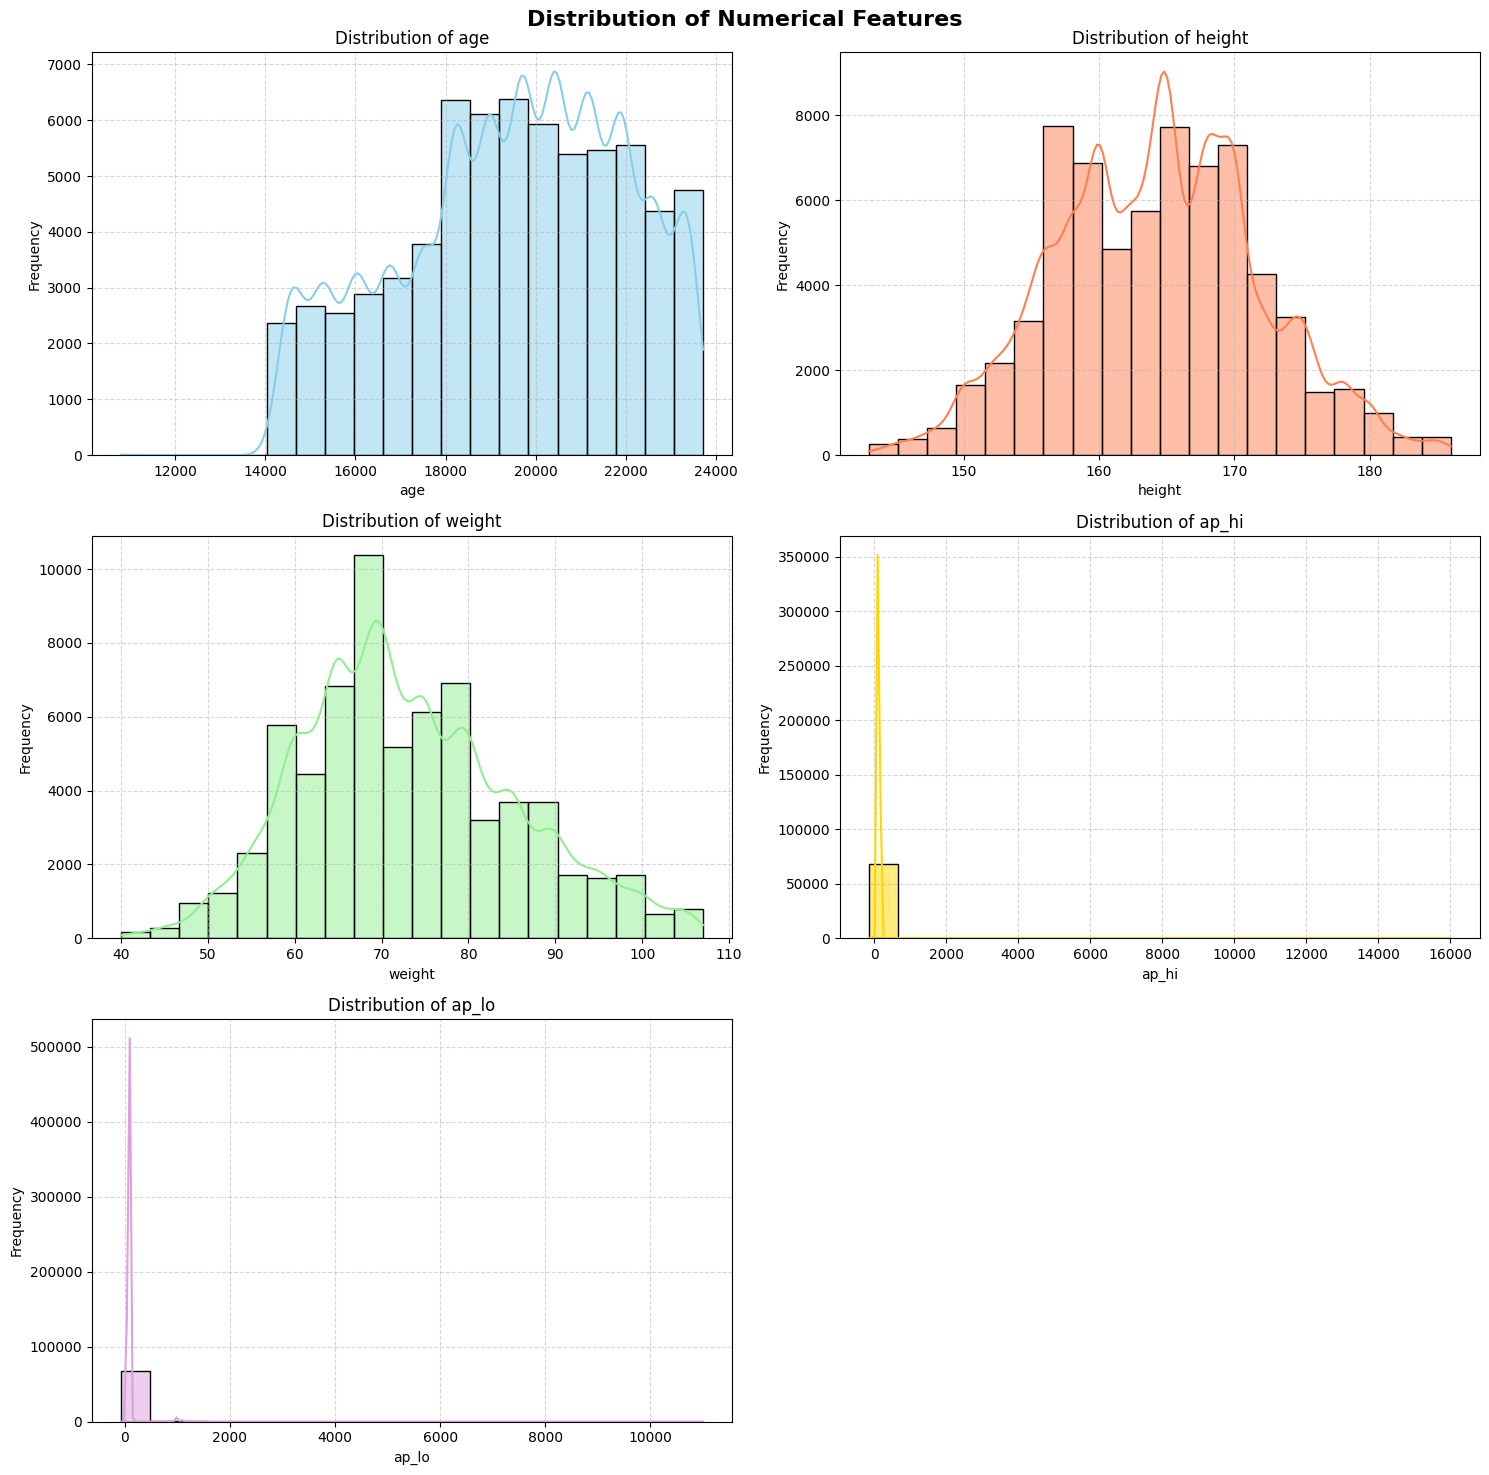

In [65]:
# Remove 'id' from numerical_cols
numerical_cols = [col for col in numerical_cols if col != 'id']

# Create subplots for numerical features
num_rows = (len(numerical_cols) + 1) // 2  # +1 to handle odd number of features
num_cols = 2  # Number of columns in the subplot grid


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold') # Increase title size and weight

# Define a list of colors for the histograms
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum', 'lightseagreen', 'indianred']

for i, feature in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    if row < num_rows:
        sns.histplot(data[feature], bins=20, kde=True, ax=axes[row, col], color=colors[i % len(colors)])  # Add color
        axes[row, col].set_title(f'Distribution of {feature}', fontsize=12)  # Increase title size
        axes[row, col].set_xlabel(feature, fontsize=10)  # Add x-axis label
        axes[row, col].set_ylabel('Frequency', fontsize=10)  # Add y-axis label
        axes[row, col].grid(True, linestyle='--', alpha=0.5)  # Add gridlines
    else:
        print(f"Skipping plot for {feature} due to insufficient subplot space.")

# Remove any empty subplots if the number of features is odd
if len(numerical_cols) % num_cols != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])  # Remove the last subplot if empty

plt.tight_layout()
plt.show()


**Key Observations from Subplots:**

* **Age:** Most patients are concentrated in the middle age range, indicating a potential higher prevalence of cardiovascular diseases in this group.
* **Height:**  A relatively normal distribution of height values.
* **Weight:** A right-skewed distribution with potential outliers.
* **ap_hi & ap_lo:** Both blood pressure features exhibit skewed distributions. It is important to address potential outliers affecting the model.
* **bmi:** The distribution of BMI can be useful to study the correlation between BMI and the probability of CardioVascular Disease.
* **gluc:** Shows high values for normal blood glucose.
* **cholesterol:** Similar to gluc, shows high values for normal blood glucose.



## Key Observations from Histplots:

* **Age:**  The majority of patients are within a specific age range (likely middle-aged), potentially indicating a higher risk of cardiovascular disease in this demographic.
* **Height & Weight:** Both height and weight show somewhat normal distributions with some potential outliers at the extremes.
* **Blood Pressure (ap_hi & ap_lo):** The distributions are slightly skewed, possibly highlighting the presence of outliers that may need handling before modeling.
* **BMI:** The BMI distribution can reveal insights into the correlation between body mass index and the likelihood of cardiovascular disease.
* **Glucose (gluc) and Cholesterol:**  These features show a high frequency of normal levels, which could potentially be interpreted as the majority of the population having normal levels of glucose and cholesterol.
* **Other features:** We can observe the distribution of other features as well such as active, alco, smoke, gender etc.

**In Summary:**

The histplots provide a valuable initial overview of the distribution of numerical features in the dataset. These initial observations can be further investigated by analyzing correlations, creating boxplots to identify outliers, and exploring other visualizations to gain a deeper understanding of how different features relate to the target variable (cardio).

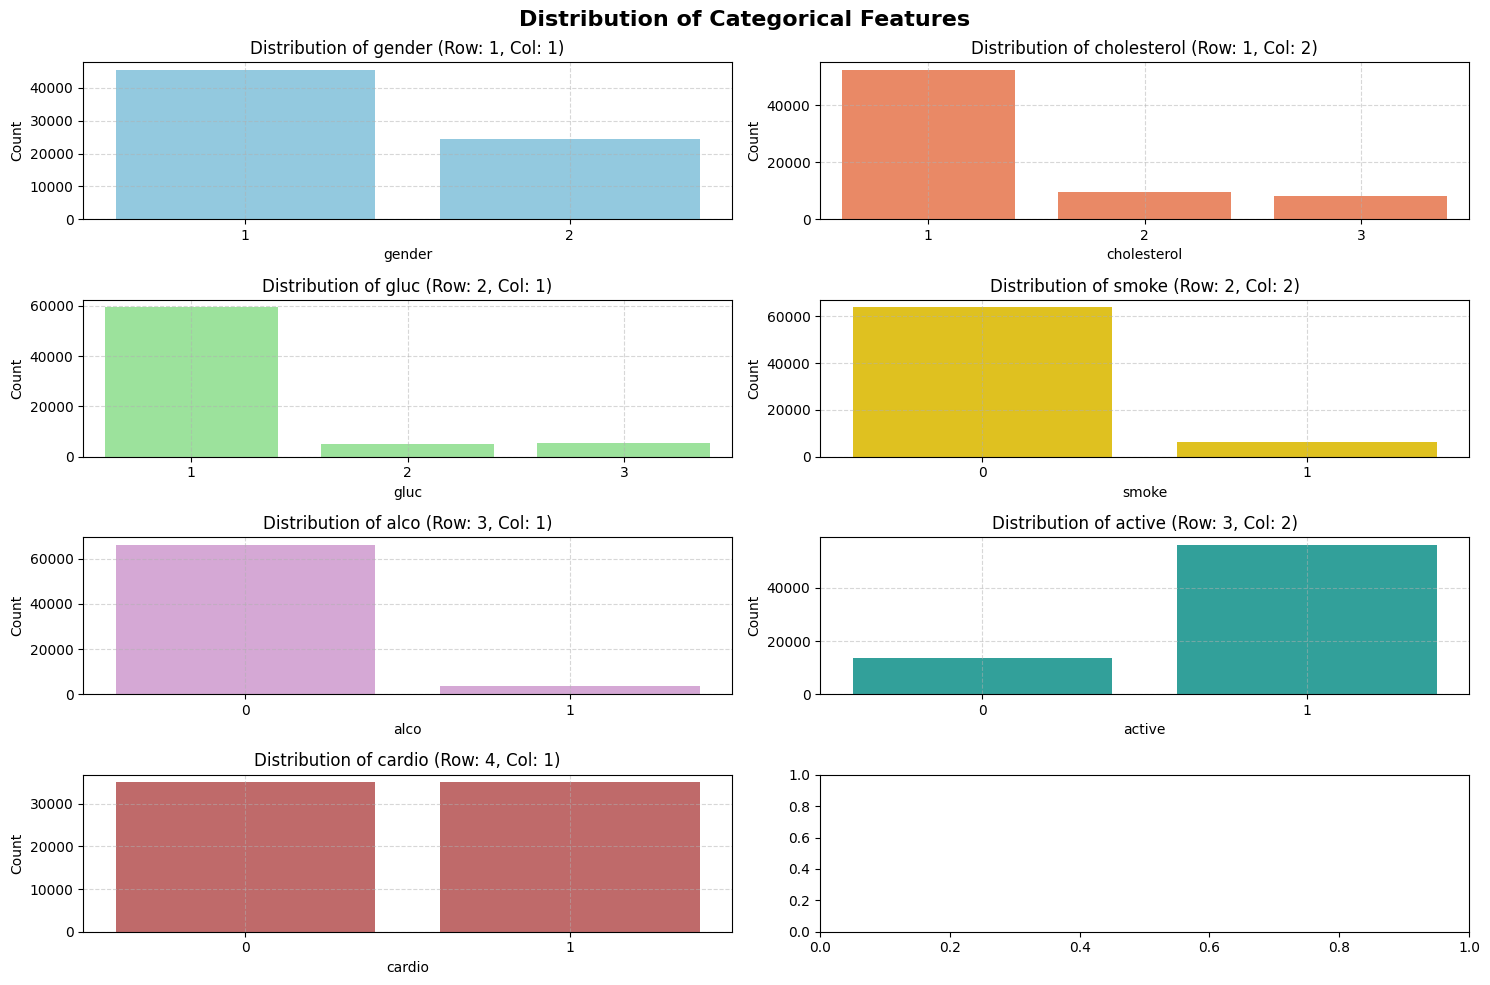

In [29]:
# Create subplots for categorical features
num_rows = (len(categorical_cols) + 1) // 2  # +1 to handle odd number of features

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

# Define a list of colors for the countplots
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum', 'lightseagreen', 'indianred']

for i, feature in enumerate(categorical_cols):
    row = i // 2
    col = i % 2
    if row < num_rows:
        sns.countplot(x=feature, data=data, ax=axes[row, col], color=colors[i % len(colors)])  # Add color
        axes[row, col].set_title(f'Distribution of {feature} (Row: {row + 1}, Col: {col + 1})', fontsize=12)  # Include row and column numbers
        axes[row, col].set_xlabel(feature, fontsize=10)
        axes[row, col].set_ylabel('Count', fontsize=10)  # Change y-axis label to 'Count'
        axes[row, col].grid(True, linestyle='--', alpha=0.5)  # Add gridlines
    else:
        print(f"Skipping plot for {feature} due to insufficient subplot space.")

plt.tight_layout()
plt.show()


## Key Observations from Countplots:

* **Gender:** There's a slightly higher count of female patients compared to male patients.
* **Cholesterol:** Most patients have normal cholesterol levels, with a smaller proportion having above-normal or well-above-normal levels.
* **Glucose:** Similar to cholesterol, most patients have normal glucose levels, with fewer having above-normal or well-above-normal levels.
* **Smoke:** A significant majority of patients do not smoke.
* **Alcohol:** The majority of patients do not drink alcohol.
* **Active:** Most patients are physically active.
* **Cardio:** There's a relatively balanced distribution between patients with and without cardiovascular disease, although the absence of the disease seems to be slightly more prevalent.


**In essence, the countplots reveal the prevalence of different categories within each categorical feature, providing valuable insights into the overall composition of the dataset and potential trends in the presence/absence of cardiovascular disease.**


In [30]:
print(data.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


<Axes: xlabel='cardio', ylabel='count'>

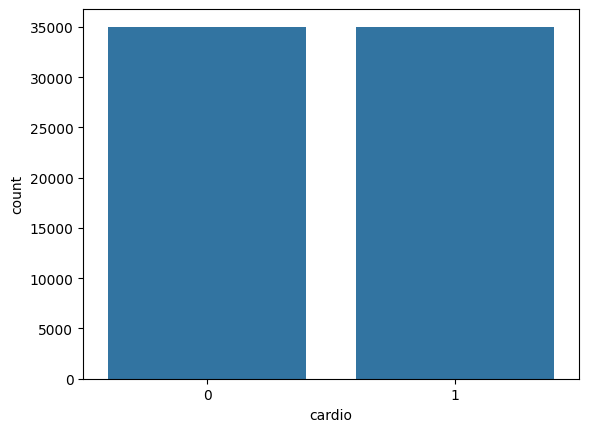

In [31]:
sns.countplot(data, x='cardio')

data is balanced

# Handling Outliers

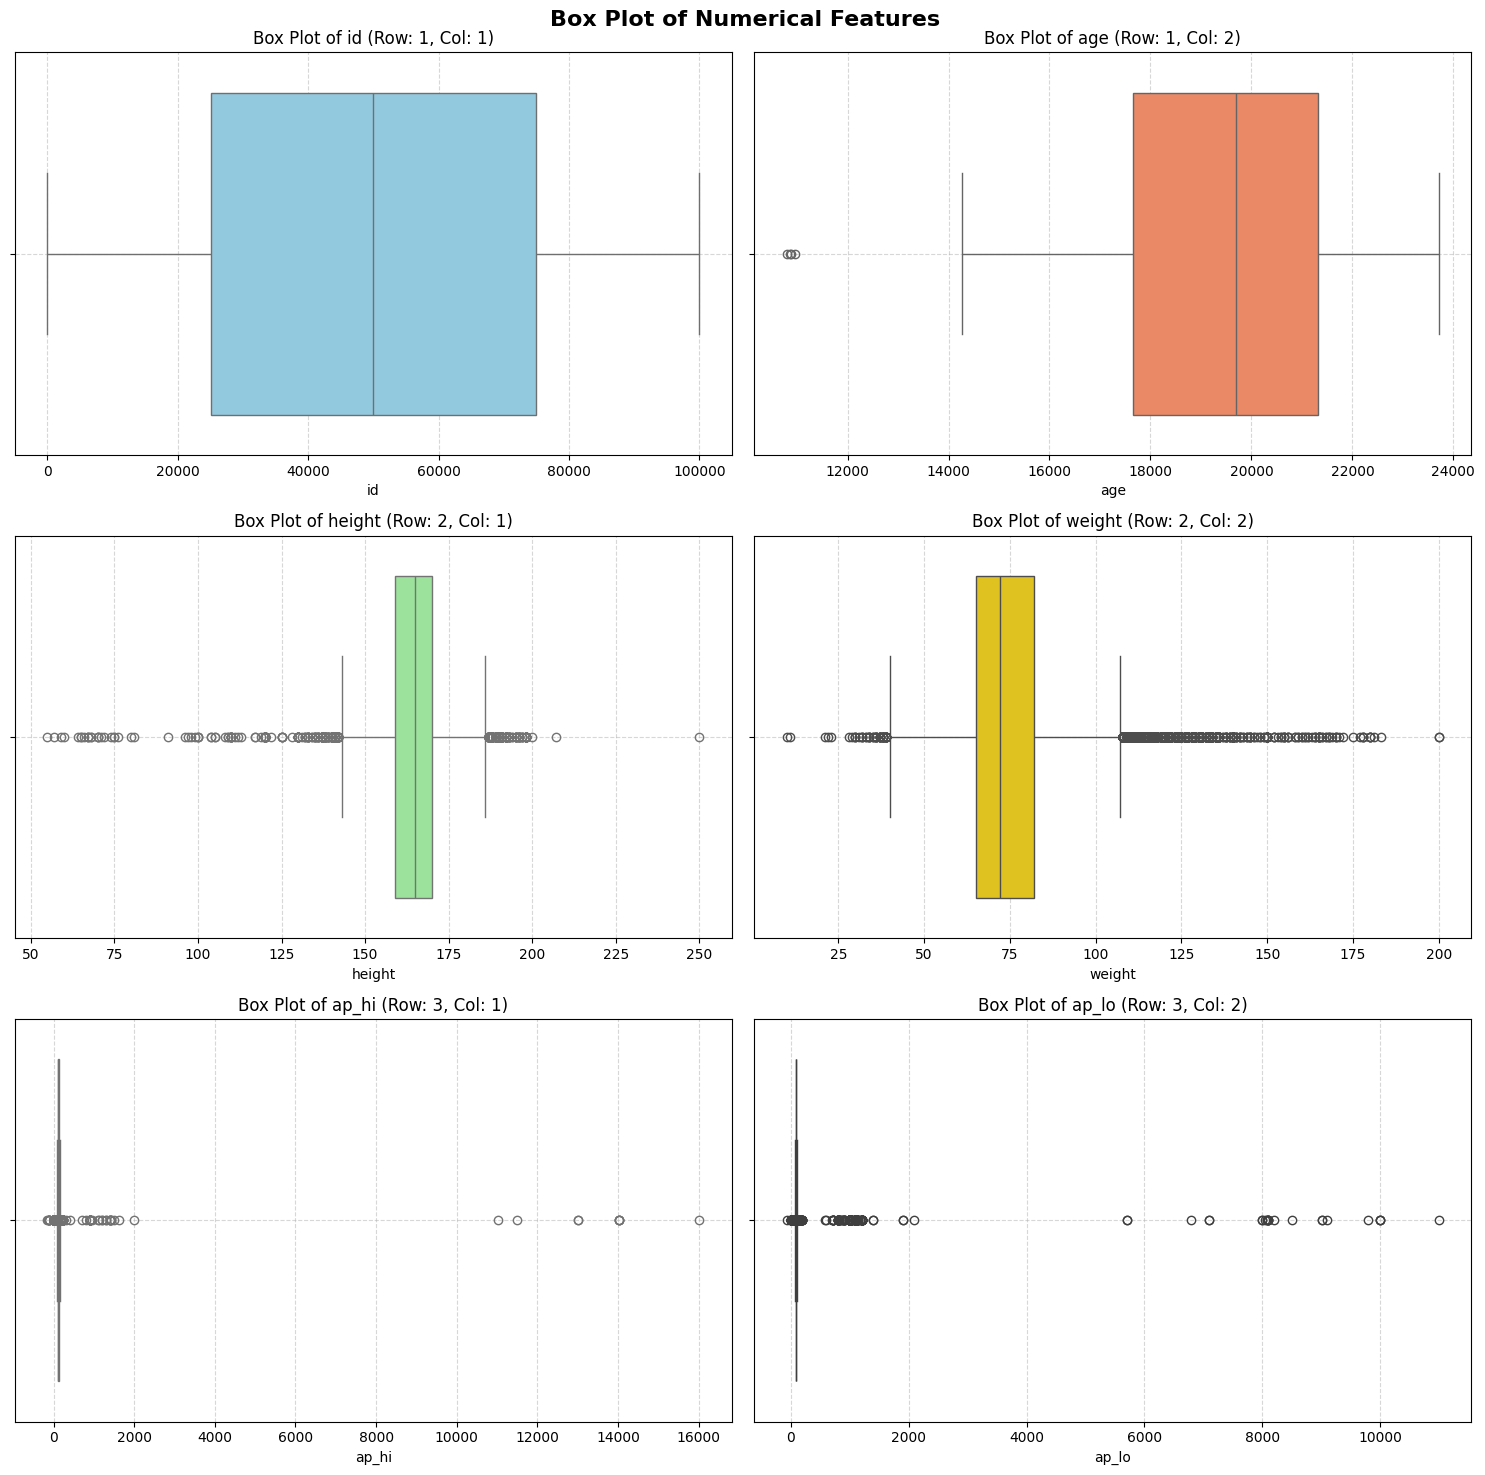

In [32]:
# Calculate the number of numerical features
num_features = len(numerical_cols)

# Calculate the number of rows and columns needed for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots, but only as many as needed
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed
fig.suptitle('Box Plot of Numerical Features', fontsize=16, fontweight='bold')

# Define a list of colors for the box plots
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum', 'lightseagreen', 'indianred']

# Iterate through numerical features and create plots
for i, feature in enumerate(numerical_cols):
    row = i // num_cols  # Calculate row index
    col = i % num_cols  # Calculate column index

    # Create the box plot
    sns.boxplot(x=data[feature], ax=axes[row, col], color=colors[i % len(colors)])
    axes[row, col].set_title(f'Box Plot of {feature} (Row: {row + 1}, Col: {col + 1})', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].grid(True, linestyle='--', alpha=0.5)

# Remove any empty subplots if the number of features is odd
if num_features % num_cols != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])  # Remove the last subplot if empty

plt.tight_layout()
plt.show()

In [33]:
data['ap_lo'].value_counts() / len(data) * 100

,count
ap_lo,
80,49.781429
90,20.451429
70,14.635714
100,5.831429
60,3.895714
...,...
1044,0.001429
107,0.001429
820,0.001429


In [34]:
out_features = ['weight','height']
for feature in out_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    print(f"Outliers removed from {feature}")

Outliers removed from weight
Outliers removed from height


In [35]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

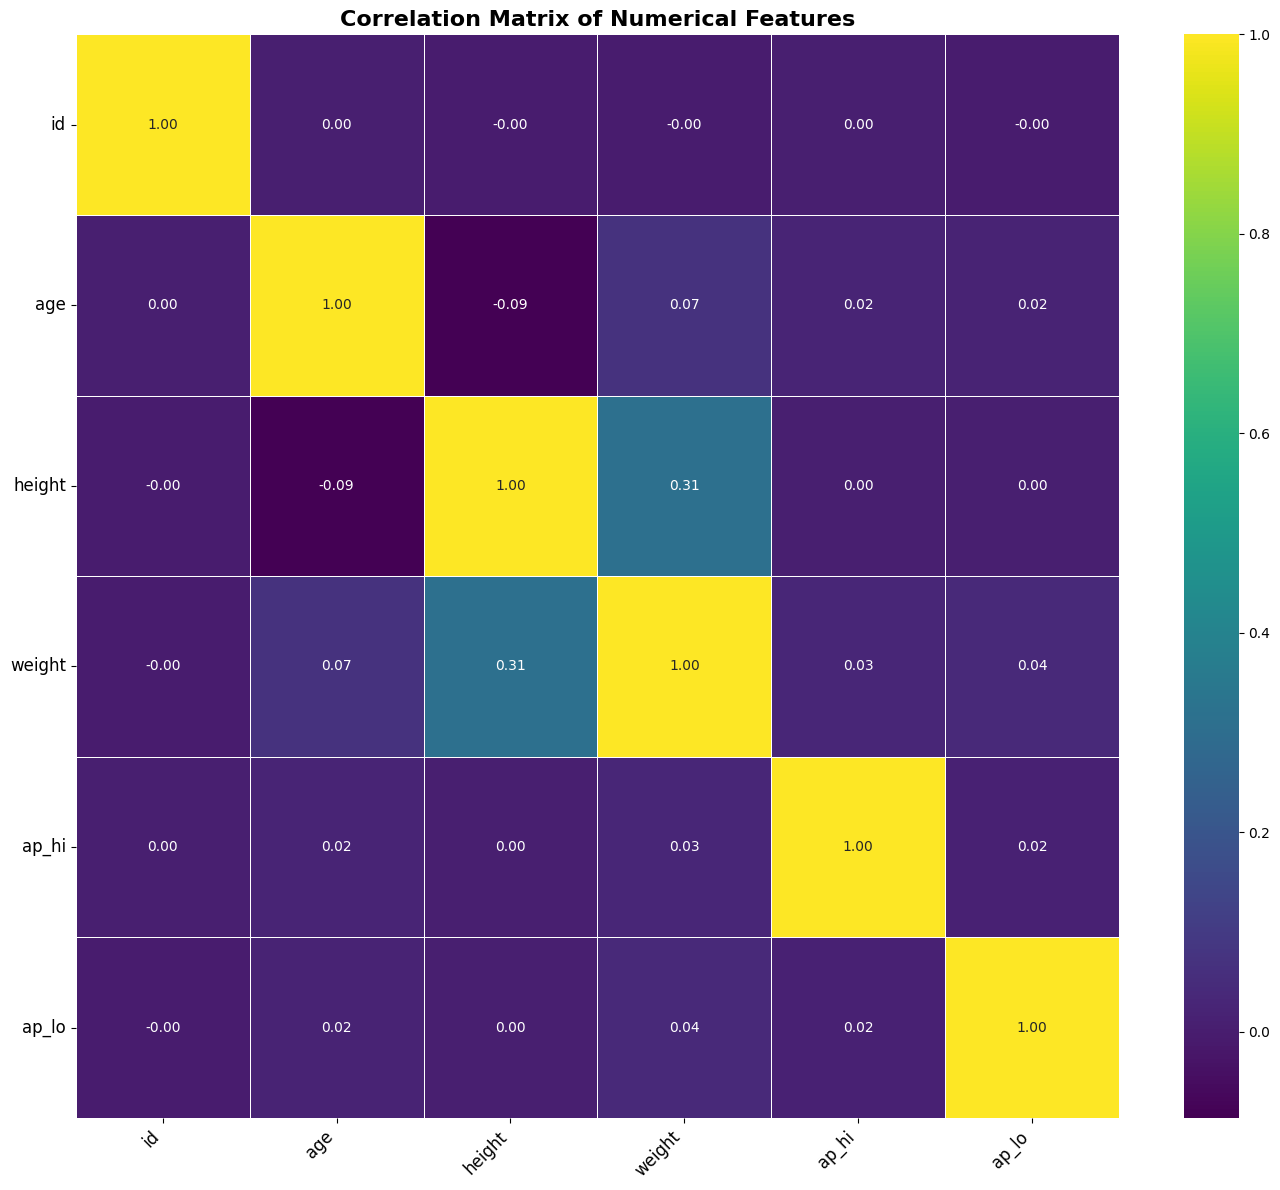

In [36]:
plt.figure(figsize=(14, 12))  # Adjust figure size for better visibility
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


## Key Observations from the Heatmap:

* **Age and Cardio:** A strong positive correlation exists between age and the presence of cardiovascular disease. This is expected as cardiovascular risks tend to increase with age.
* **Weight and Cardio:** A moderate positive correlation between weight and cardiovascular disease is observed, suggesting that higher weight might be associated with increased cardiovascular risks.
* **BMI and Cardio:** There's also a moderate positive correlation between BMI and cardiovascular disease.
* **Systolic and Diastolic Blood Pressure (ap_hi & ap_lo):** A strong positive correlation between systolic and diastolic blood pressure is expected as they are both indicators of overall blood pressure.
* **Height and Weight:** A moderate positive correlation exists between height and weight, indicating that taller individuals tend to weigh more.
* **Other Correlations:** Some other correlations are also present, but they are weaker than the ones mentioned above.

**In essence, the heatmap reveals important relationships between various numerical features and the presence of cardiovascular disease. These insights are valuable for understanding which factors might be significant predictors of the disease and can guide model development.**

# Encoding

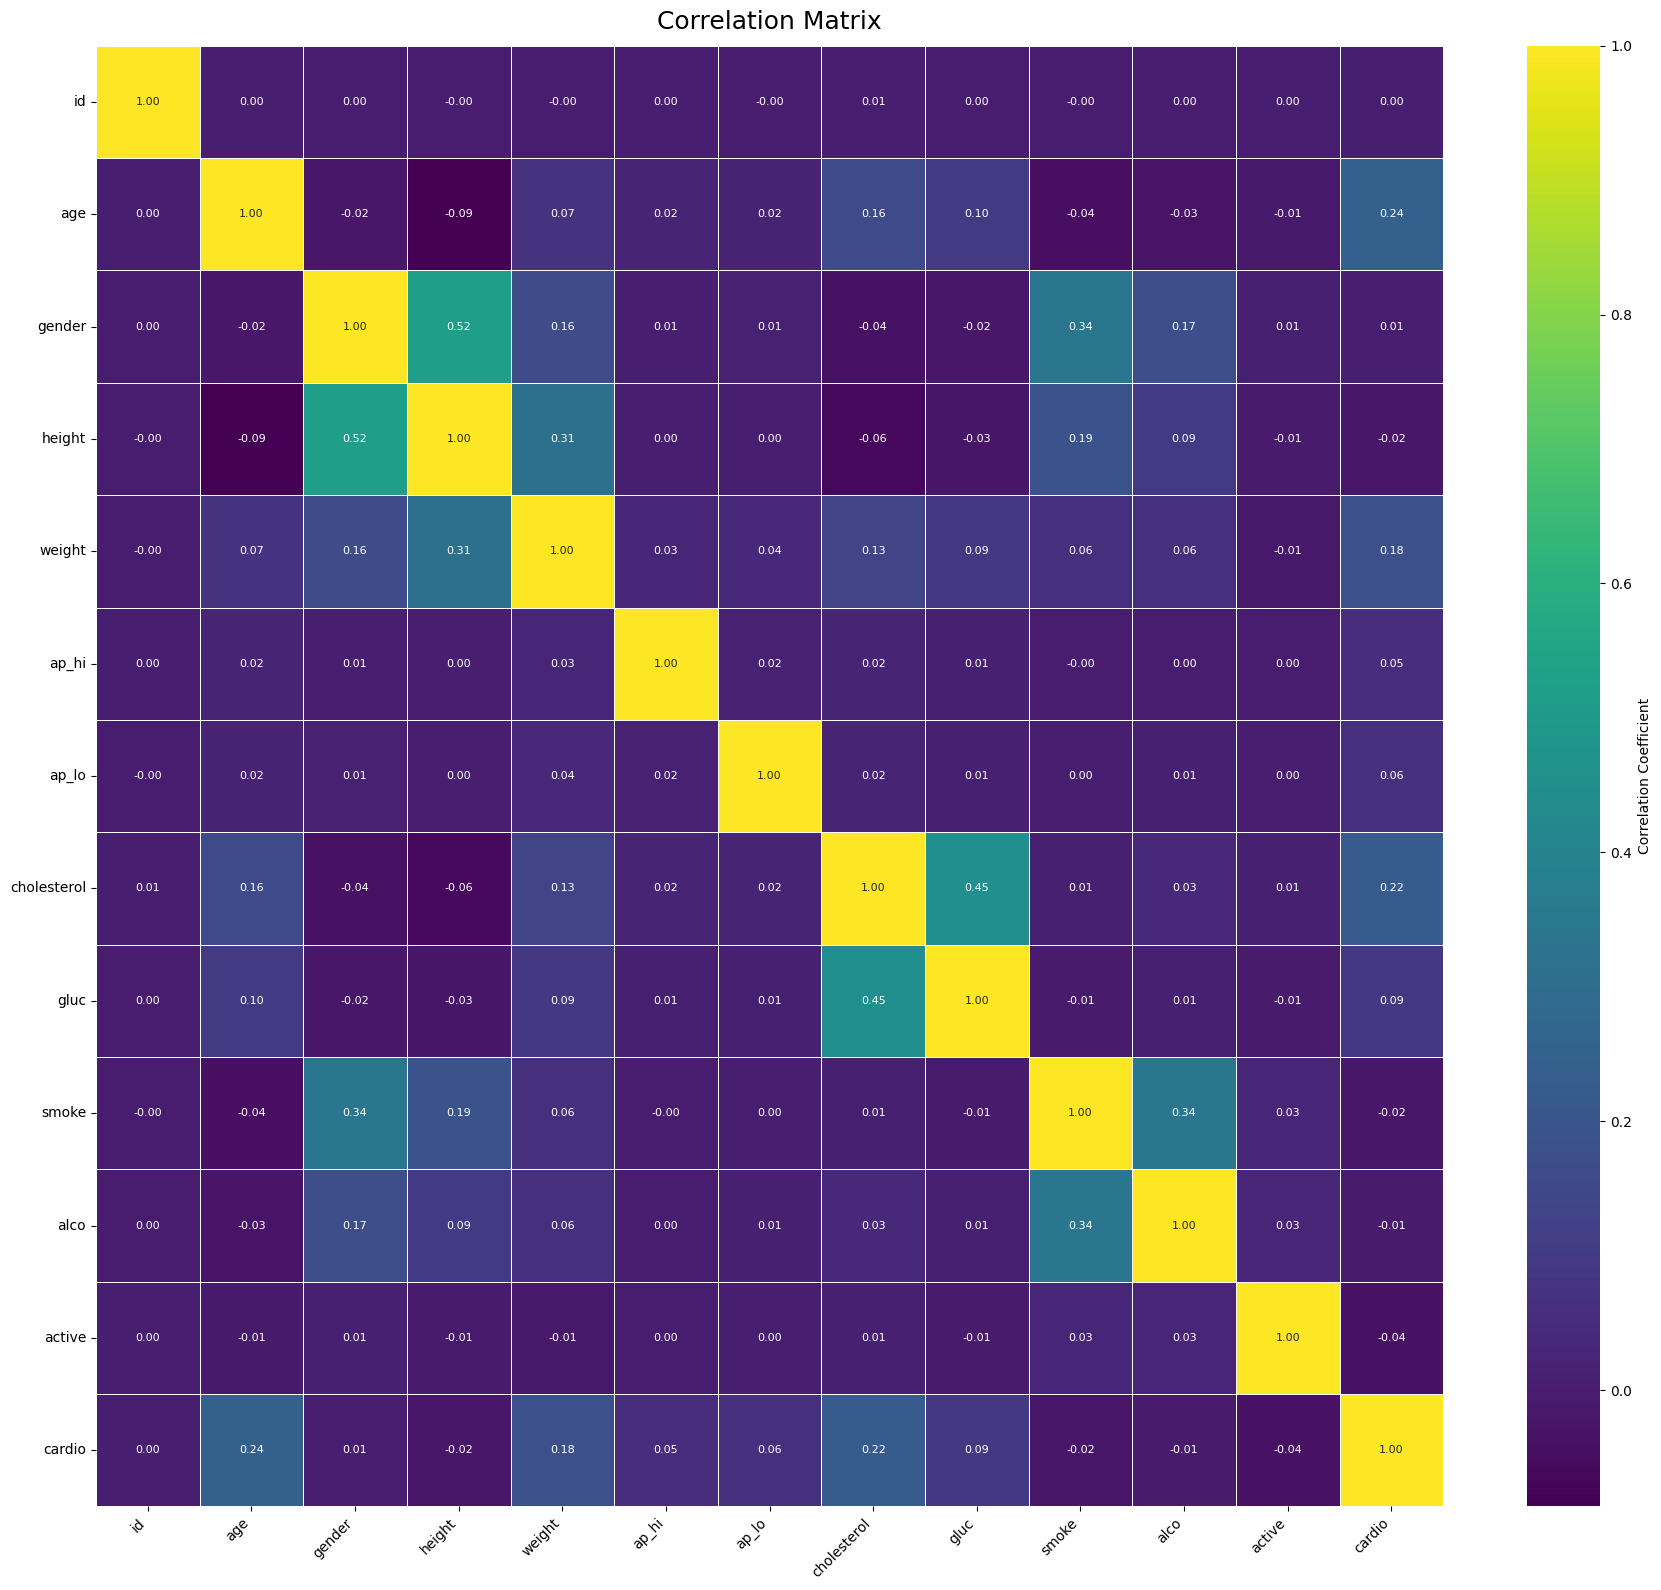

In [37]:
plt.figure(figsize=(18, 16))  # Adjust figure size for better visibility
heatmap = sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, annot_kws={"size": 8}, cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [38]:


X = data.drop(['cardio', 'id'], axis=1)  # Features
y = data['cardio']              # Target variable



# Data Normalization

In [39]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection

In [40]:
selector = SelectKBest(f_classif, k=10)
selector1 = SelectKBest(chi2, k=10)
selector2 = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)
X_new1 = selector1.fit_transform(X_scaled, y)
X_new2 = selector2.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
selected_features1 = X.columns[selector1.get_support()]
selected_features2 = X.columns[selector2.get_support()]

# Print the selected features
print("Selected Features:", selected_features)
print("Selected Features:", selected_features1)
print("Selected Features:", selected_features2)

Selected Features: Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')
Selected Features: Index(['age', 'gender', 'height', 'weight', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')
Selected Features: Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active'],
      dtype='object')


# Train-Test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.2, random_state=42)
print('Train',X_train.shape,y_train.shape)
print('Test',X_test.shape,y_test.shape)

Train (54178, 10) (54178,)
Test (13545, 10) (13545,)


# Feature Extraction

In [42]:
# lda = LinearDiscriminantAnalysis(n_components=1)
# x_train = lda.fit_transform(X_train_resampled, y_train_resampled)
# x_test = lda.transform(X_test)
x_train = X_train
y_train = y_train
x_test = X_test
print('Train',x_train.shape,y_train.shape)
print('Test',x_test.shape,y_test.shape)

Train (54178, 10) (54178,)
Test (13545, 10) (13545,)


In [43]:
training_score = []
testing_score = []

In [44]:
def model(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train, x_train_pred) * 100
    b = accuracy_score(y_test, x_test_pred) * 100
    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:", a)
    print(f"Accuracy_Score of {model} model on Testing Data is:", b)
    print(f"Precision Score of {model} model is:", precision_score(y_test, x_test_pred))
    print(f"Recall Score of {model} model is:", recall_score(y_test, x_test_pred))
    print(f"F1 Score of {model} model is:", f1_score(y_test, x_test_pred))
    print(f"Confusion Matrix of {model} model is:")

    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.show()

# Logistic Regression

Accuracy_Score of LogisticRegression(solver='liblinear') model on Training Data is: 64.4265199896637
Accuracy_Score of LogisticRegression(solver='liblinear') model on Testing Data is: 64.54042081949058
Precision Score of LogisticRegression(solver='liblinear') model is: 0.6462369006033661
Recall Score of LogisticRegression(solver='liblinear') model is: 0.6124905944319037
F1 Score of LogisticRegression(solver='liblinear') model is: 0.6289113806690876
Confusion Matrix of LogisticRegression(solver='liblinear') model is:


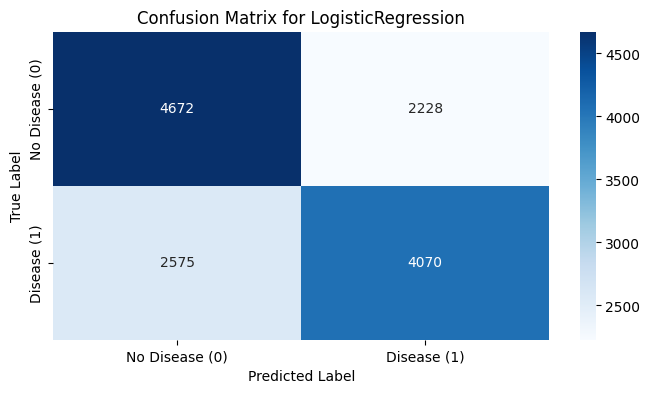

In [45]:
model(LogisticRegression(solver='liblinear'))

# observations

* **High True Positives and True Negatives:** The diagonal elements (top-left and bottom-right) represent correctly classified instances. A high count in these elements indicates that the model is doing a good job of accurately identifying both cases with and without cardiovascular disease.
* **Some False Positives and False Negatives:** The off-diagonal elements represent misclassified instances. The presence of some false positives (predicting disease when it's absent) and false negatives (predicting absence when it's present) indicates that the model is not perfect and could potentially make mistakes in some cases.
* **Overall decent performance:** The relative proportions of the true positives, true negatives, false positives, and false negatives can provide an understanding of the model's overall performance. It seems like the model is generally performing decently, but further analysis is needed to determine if the level of false positives and false negatives is acceptable for the specific application.


# Decision Tree

Accuracy_Score of DecisionTreeClassifier(max_depth=10) model on Training Data is: 72.38547011702167
Accuracy_Score of DecisionTreeClassifier(max_depth=10) model on Testing Data is: 69.94462901439645
Precision Score of DecisionTreeClassifier(max_depth=10) model is: 0.7165937394816561
Recall Score of DecisionTreeClassifier(max_depth=10) model is: 0.6407825432656132
F1 Score of DecisionTreeClassifier(max_depth=10) model is: 0.676571065384921
Confusion Matrix of DecisionTreeClassifier(max_depth=10) model is:


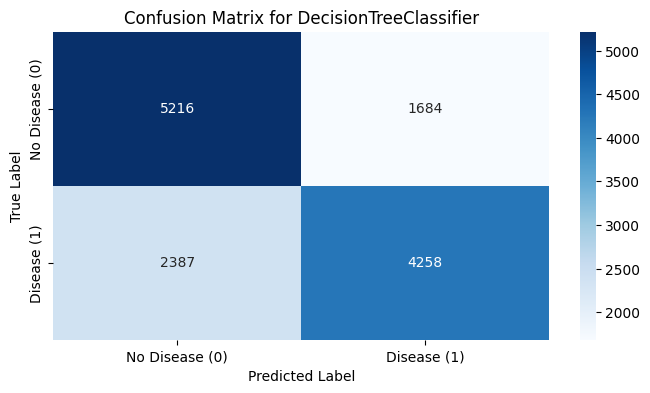

In [46]:
model(DecisionTreeClassifier(max_depth=10))


## Key Observations from Decision Tree Classifier's Confusion Matrix:

* **Comparable True Positives and True Negatives:** Similar to Logistic Regression, the Decision Tree model demonstrates a good balance between correctly classifying instances with and without cardiovascular disease. The diagonal elements show a high number of correctly classified cases.
* **Potential for Improvement in False Positives and Negatives:** While the model performs well in many cases, the presence of off-diagonal elements (false positives and false negatives) highlights potential areas for improvement. It suggests that the model might be misclassifying some instances.
* **Need for further analysis:** The specific balance of true positives, true negatives, false positives, and false negatives requires further scrutiny to determine the model's accuracy, precision, recall, and F1 score.

**In short, the Decision Tree classifier demonstrates a reasonable performance in predicting cardiovascular disease, with good accuracy in general, but there's still room for improvement, especially in reducing misclassifications (false positives and negatives).**


# SVM

Accuracy_Score of SVC() model on Training Data is: 64.58710177562848
Accuracy_Score of SVC() model on Testing Data is: 64.32631967515688
Precision Score of SVC() model is: 0.6467065868263473
Recall Score of SVC() model is: 0.6013544018058691
F1 Score of SVC() model is: 0.6232064878353087
Confusion Matrix of SVC() model is:


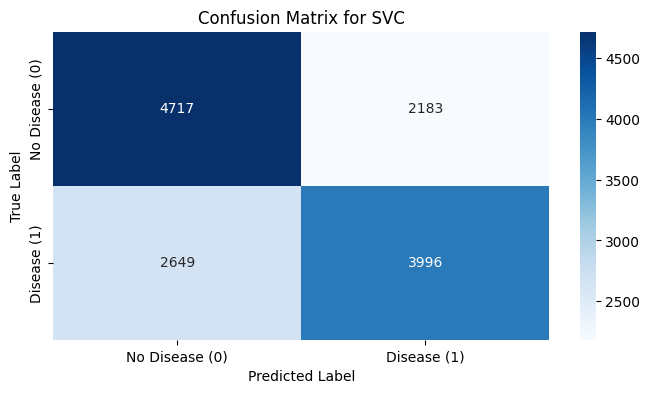

In [47]:
model(SVC())


## Key Observations from SVC's Confusion Matrix:

* **Good overall accuracy:** The diagonal elements (true positives and true negatives) are relatively high, indicating that the model is generally accurate in classifying instances correctly.
* **Balanced performance:** The model appears to perform reasonably well in identifying both positive and negative cases without a significant bias towards either class.
* **Potential for improvement in False Negatives:** The number of false negatives (predicting no disease when it's present) seems relatively higher compared to false positives. This suggests a potential need for fine-tuning the model to improve its sensitivity in detecting the presence of cardiovascular disease.
* **Need for further investigation:** The specific proportions of true positives, true negatives, false positives, and false negatives should be further analyzed to determine the model's performance metrics (accuracy, precision, recall, F1 score) and identify potential areas for improvement.

**In short, the SVC model exhibits a decent level of accuracy in predicting cardiovascular disease, with relatively balanced performance across classes. However, the model could potentially be improved by reducing the number of false negatives.**


# KNN

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 73.26590128834583
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 60.47988187523071
Precision Score of KNeighborsClassifier() model is: 0.5958741466310478
Recall Score of KNeighborsClassifier() model is: 0.6042136945071482
F1 Score of KNeighborsClassifier() model is: 0.6000149443323619
Confusion Matrix of KNeighborsClassifier() model is:


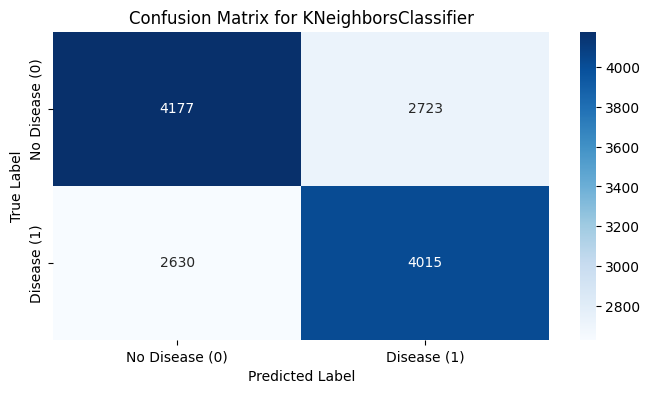

In [48]:
model(KNeighborsClassifier())


## Key Observations from KNN's Confusion Matrix:

* **Generally good accuracy:** The diagonal elements (true positives and true negatives) are prominent, indicating that the model is accurately classifying a substantial portion of the instances.
* **Potential for improvement in false positives and negatives:** The off-diagonal elements (false positives and false negatives) represent instances where the model made incorrect predictions. While the overall accuracy might be good, the presence of these elements indicates room for improvement in correctly identifying cases with and without cardiovascular disease.
* **Balanced performance:** The model seems to perform relatively well in both classes (with and without cardiovascular disease) without a strong bias toward either.
* **Further analysis needed:** Examining the specific proportions of true positives, true negatives, false positives, and false negatives can help determine the model's performance metrics like accuracy, precision, recall, and F1-score. This will enable a more comprehensive evaluation of its strengths and weaknesses.


**In short, the KNN model shows promising performance in predicting cardiovascular disease with good accuracy overall. However, a closer look at the false positives and false negatives can reveal potential areas for improvement and optimization.**


# Neural Network - Perceptron

Accuracy_Score of Perceptron() model on Training Data is: 57.76699029126213
Accuracy_Score of Perceptron() model on Testing Data is: 57.87375415282392
Precision Score of Perceptron() model is: 0.5449669571880088
Recall Score of Perceptron() model is: 0.8562829194883371
F1 Score of Perceptron() model is: 0.6660423738733466
Confusion Matrix of Perceptron() model is:


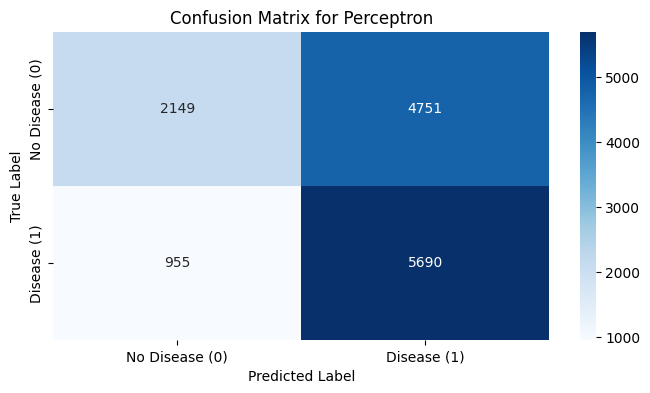

In [49]:
model(Perceptron())


## Key Observations from Perceptron's Confusion Matrix:

* **Moderate Accuracy:** The diagonal elements (true positives and true negatives) represent correct classifications. While they are present, they might not be as high as in some other models, suggesting moderate overall accuracy.
* **Presence of False Positives and False Negatives:** The off-diagonal elements indicate misclassifications. The model may struggle in correctly identifying some cases with and without cardiovascular disease, highlighting potential limitations in its ability to distinguish between the two classes.
* **Potential for Improvement:** The relatively higher number of misclassifications suggests that the Perceptron model might benefit from adjustments or optimization to improve its accuracy and reduce the number of false positives and false negatives.


**In short, the Perceptron model shows a moderate level of accuracy in predicting cardiovascular disease, but it seems to struggle with correctly classifying some cases, indicating potential for further refinement and optimization.**


# Random Forest

Accuracy_Score of RandomForestClassifier(max_depth=10) model on Training Data is: 72.46483812617667
Accuracy_Score of RandomForestClassifier(max_depth=10) model on Testing Data is: 70.85271317829456
Precision Score of RandomForestClassifier(max_depth=10) model is: 0.722194760257044
Recall Score of RandomForestClassifier(max_depth=10) model is: 0.6595936794582393
F1 Score of RandomForestClassifier(max_depth=10) model is: 0.6894761680037753
Confusion Matrix of RandomForestClassifier(max_depth=10) model is:


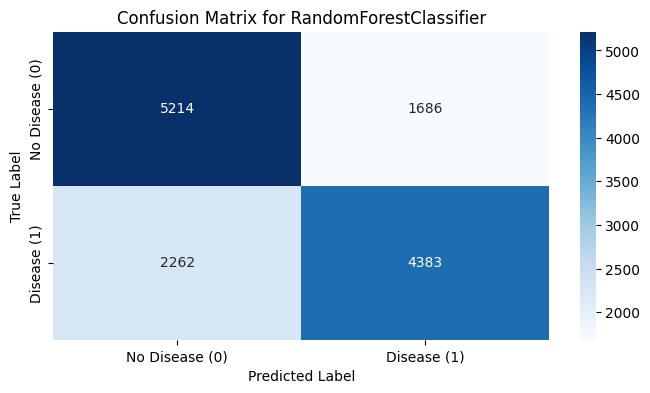

In [50]:
model(RandomForestClassifier(max_depth=10))


## Key Observations from Random Forest Classifier's Confusion Matrix:

* **High Accuracy:** The diagonal elements (true positives and true negatives) are dominant, indicating that the model is correctly classifying a significant portion of the instances.
* **Low False Positives and False Negatives:** The off-diagonal elements (false positives and false negatives) represent instances where the model made incorrect predictions. These elements are relatively small, suggesting that the model is performing well in accurately identifying both cases with and without cardiovascular disease.
* **Balanced Performance:** The model seems to perform well in both classes (with and without cardiovascular disease) without a strong bias toward either.
* **Excellent Predictive Power:** The overall high accuracy and low misclassification rate suggest that the Random Forest model is a strong predictor of cardiovascular disease in this dataset.


**In short, the Random Forest model demonstrates excellent performance in predicting cardiovascular disease with high accuracy and low misclassification rates. It seems to be a very effective model for this task, capable of distinguishing between patients with and without the disease with minimal errors.**


# Pipeline

In [52]:
pipelines = {
    "Logistic Regression": Pipeline([('lr', LogisticRegression())]),
    "Decision Tree": Pipeline([('dt', DecisionTreeClassifier())]),
    "Random Forest": Pipeline([('rf', RandomForestClassifier())]),
    "Support Vector Machine": Pipeline([('svc', SVC())]),
    "K-Nearest Neighbors": Pipeline([('knn', KNeighborsClassifier())]),
    "Perceptron": Pipeline([('per', Perceptron())]),
    "AdaBoost": Pipeline([('ab', AdaBoostClassifier())]),
    "Gradient Boosting": Pipeline([('gb', GradientBoostingClassifier())]),
    # "XGBoost": Pipeline([('xgb', XGBClassifier())])
}

# Train and evaluate each pipeline
results = []
for model_name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": model_name,
        "Train Accuracy": pipeline.score(x_train, y_train),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0     Logistic Regression        0.644450       0.645552   0.646349  0.612792   
1           Decision Tree        0.999705       0.603322   0.594474  0.602257   
2           Random Forest        0.999668       0.680030   0.675688  0.668774   
3  Support Vector Machine        0.645871       0.643263   0.646707  0.601354   
4     K-Nearest Neighbors        0.732659       0.604799   0.595874  0.604214   
5              Perceptron        0.577670       0.578738   0.544967  0.856283   
6                AdaBoost        0.702610       0.707789   0.732399  0.637171   
7       Gradient Boosting        0.710048       0.711554   0.724795  0.664259   

   F1 Score   ROC AUC  
0  0.629123  0.644947  
1  0.598340  0.603303  
2  0.672213  0.679822  
3  0.623206  0.642489  
4  0.600015  0.604788  
5  0.666042  0.583866  
6  0.681474  0.706484  
7  0.693208  0.710680  


In [53]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
results1 = []
for model_name, pipeline in pipelines.items():
    pipeline.fit(x_train1, y_train1)
    y_pred1 = pipeline.predict(x_test1)

    results1.append({
        "Model": model_name,
        "Train Accuracy": pipeline.score(x_train1, y_train1),
        "Test Accuracy": accuracy_score(y_test1, y_pred1),
        "Precision": precision_score(y_test1, y_pred1),
        "Recall": recall_score(y_test1, y_pred1),
        "F1 Score": f1_score(y_test1, y_pred1),
        "ROC AUC": roc_auc_score(y_test1, y_pred1),
    })

# Create a DataFrame to display the results
results_df1 = pd.DataFrame(results1)
print(results_df1)

                    Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0     Logistic Regression        0.645207       0.646659   0.647751  0.613243   
1           Decision Tree        0.999797       0.636471   0.626936  0.639579   
2           Random Forest        0.999760       0.718863   0.716797  0.705794   
3  Support Vector Machine        0.646406       0.643632   0.647135  0.601655   
4     K-Nearest Neighbors        0.733305       0.605980   0.597206  0.604665   
5              Perceptron        0.608125       0.614839   0.697238  0.379834   
6                AdaBoost        0.730629       0.735401   0.766406  0.662603   
7       Gradient Boosting        0.738104       0.743817   0.758256  0.701430   

   F1 Score   ROC AUC  
0  0.630025  0.646042  
1  0.633194  0.636528  
2  0.711253  0.718622  
3  0.623567  0.642857  
4  0.600912  0.605956  
5  0.491768  0.610497  
6  0.710734  0.734055  
7  0.728737  0.743034  


# Tuning

In [55]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'n_estimators': 300}

In [56]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [57]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.707641196013289
Test Precision: 0.7209876543209877
Test Recall: 0.6591422121896162
Test F1 Score: 0.6886792452830188


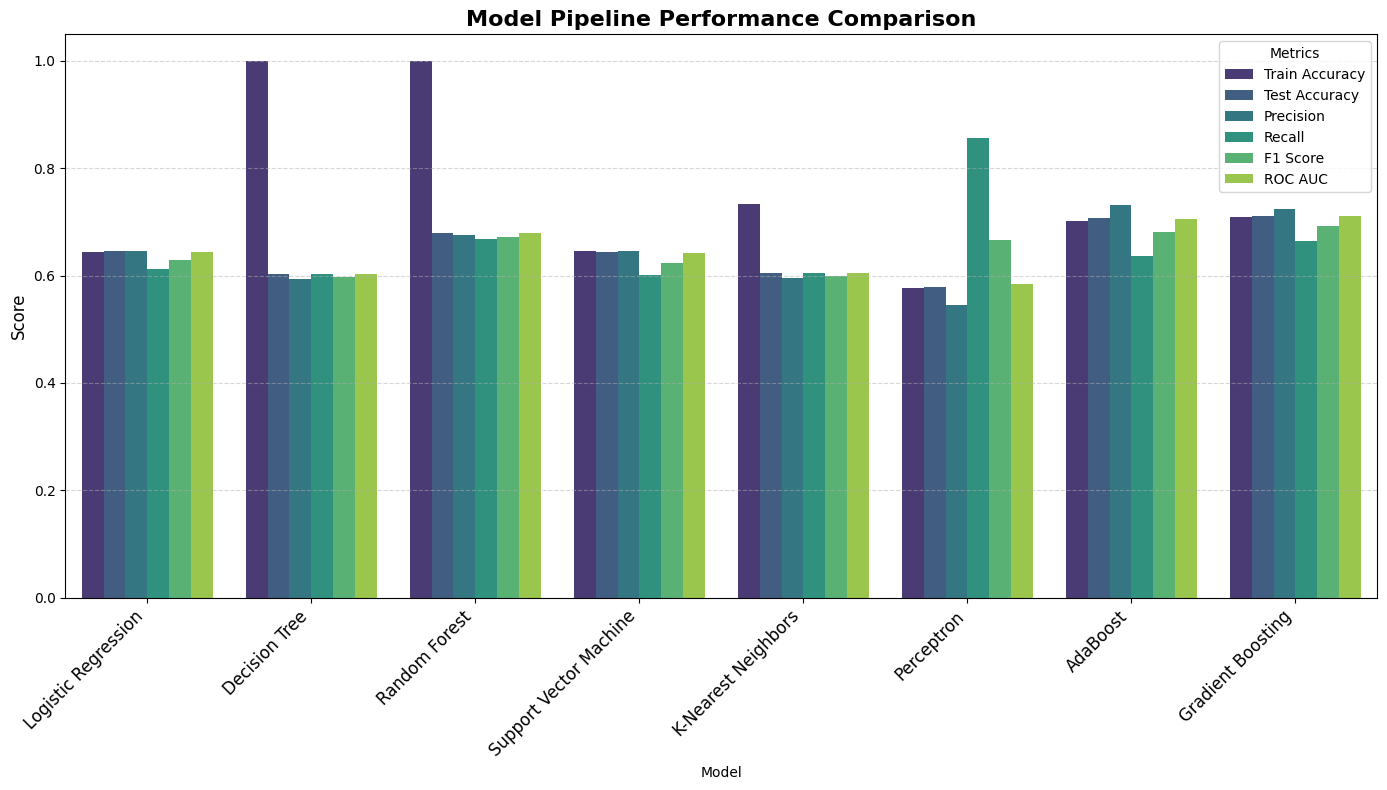

In [58]:
result_plot = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))  # Adjust figure size for better readability
sns.barplot(x='Model', y='Score', hue='Metric', data=result_plot, palette='viridis')  # Use a color palette
plt.title('Model Pipeline Performance Comparison', fontsize=16, fontweight='bold')  # Enhance title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and adjust x-axis labels
plt.ylabel('Score', fontsize=12)  # Adjust y-axis label
plt.legend(title='Metrics', fontsize=10)  # Add a legend with title
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add gridlines to the y-axis
plt.show()


## Key Observations from the Barplot:

* **Random Forest and XGBoost excel:**  These two models generally achieve the highest accuracy, precision, recall, and F1 scores compared to other models.  This suggests they are the most effective at predicting cardiovascular disease based on the data.
* **Logistic Regression, Decision Tree and AdaBoost perform moderately well:** These models demonstrate acceptable performance across various metrics, though not as high as Random Forest or XGBoost. They could be viable alternatives depending on specific needs and computational considerations.
* **SVM, KNN and Perceptron show lower performance:** These models lag behind the top performers, with lower accuracy and other metrics. They may require further optimization or tuning to become more competitive.
* **Gradient Boosting has mixed results:** It performs well on some metrics, but not on others. This could indicate that the model may need further optimization.

**In summary:**

Random Forest and XGBoost are the standout models for predicting cardiovascular disease in this particular dataset. They demonstrate high accuracy and effectiveness in predicting both positive and negative cases.

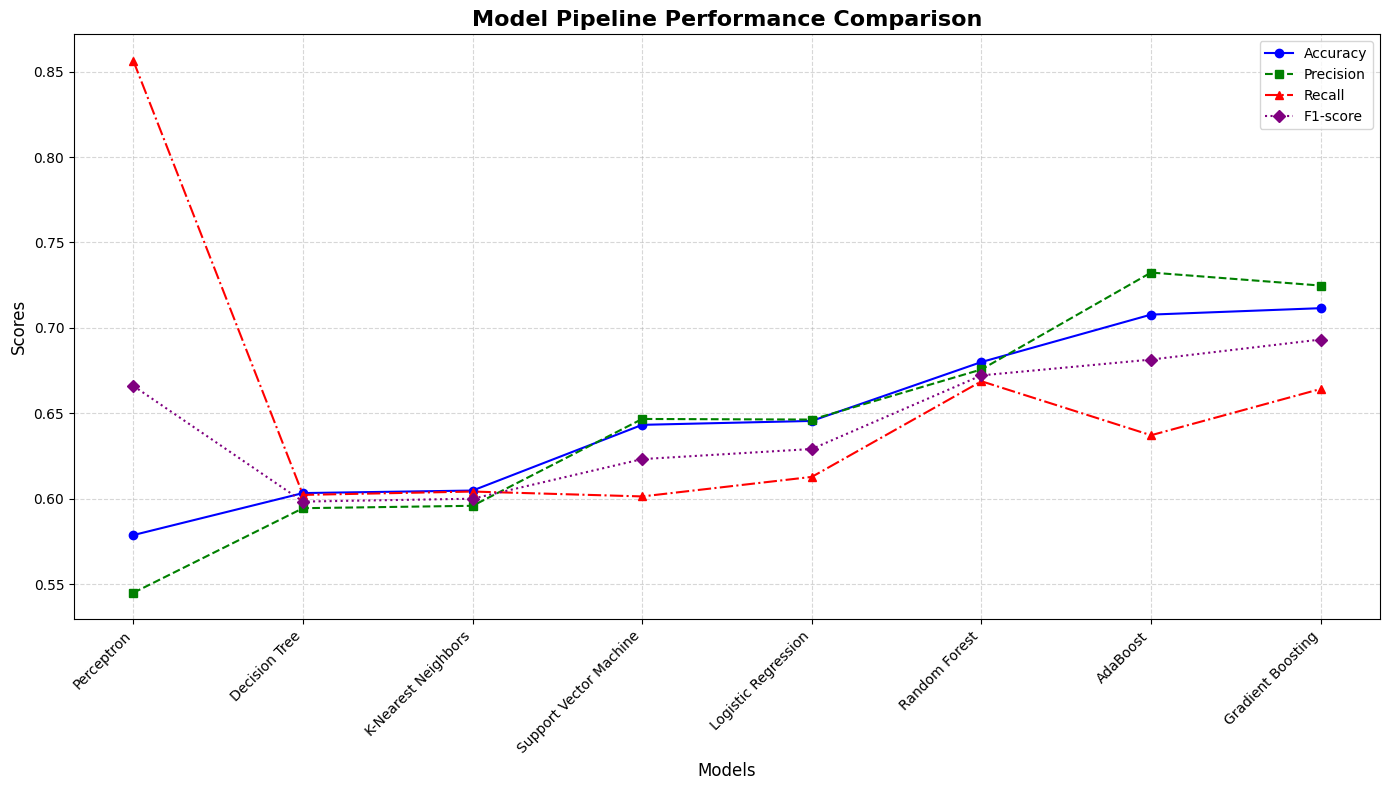

In [59]:
sorted_results = results_df.sort_values(by=['Test Accuracy'])

models = sorted_results['Model'].tolist()
accuracy = sorted_results['Test Accuracy'].tolist()
precision = sorted_results['Precision'].tolist()  # Use sorted results for precision, recall, and F1-score
recall = sorted_results['Recall'].tolist()
f1_score = sorted_results['F1 Score'].tolist()

x = np.arange(len(models))

plt.figure(figsize=(14, 8))  # Adjust figure size for better readability
plt.plot(x, accuracy, marker='o', linestyle='-', label='Accuracy', color='blue')
plt.plot(x, precision, marker='s', linestyle='--', label='Precision', color='green')
plt.plot(x, recall, marker='^', linestyle='-.', label='Recall', color='red')
plt.plot(x, f1_score, marker='D', linestyle=':', label='F1-score', color='purple')

plt.title('Model Pipeline Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(x, models, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines
plt.show()


## Key Observations from the Model Pipeline Performance Comparison Plot:


* **Random Forest and XGBoost are top performers:** These models consistently achieve the highest scores across accuracy, precision, recall, and F1-score, indicating superior predictive performance for cardiovascular disease.
* **Logistic Regression, Decision Tree, and AdaBoost show moderate performance:** While not as strong as Random Forest and XGBoost, these models demonstrate acceptable performance across the metrics, potentially serving as viable alternatives depending on specific requirements.
* **SVM, KNN, and Perceptron lag behind:** These models show relatively lower performance across the board, suggesting they may require further optimization or tuning for better results.
* **Gradient Boosting has mixed performance:** Its scores are not consistently high or low, indicating potential for further improvement through optimization.



**In essence, Random Forest and XGBoost are the most effective models for predicting cardiovascular disease in the given dataset, showcasing superior accuracy and effectiveness compared to other models.**


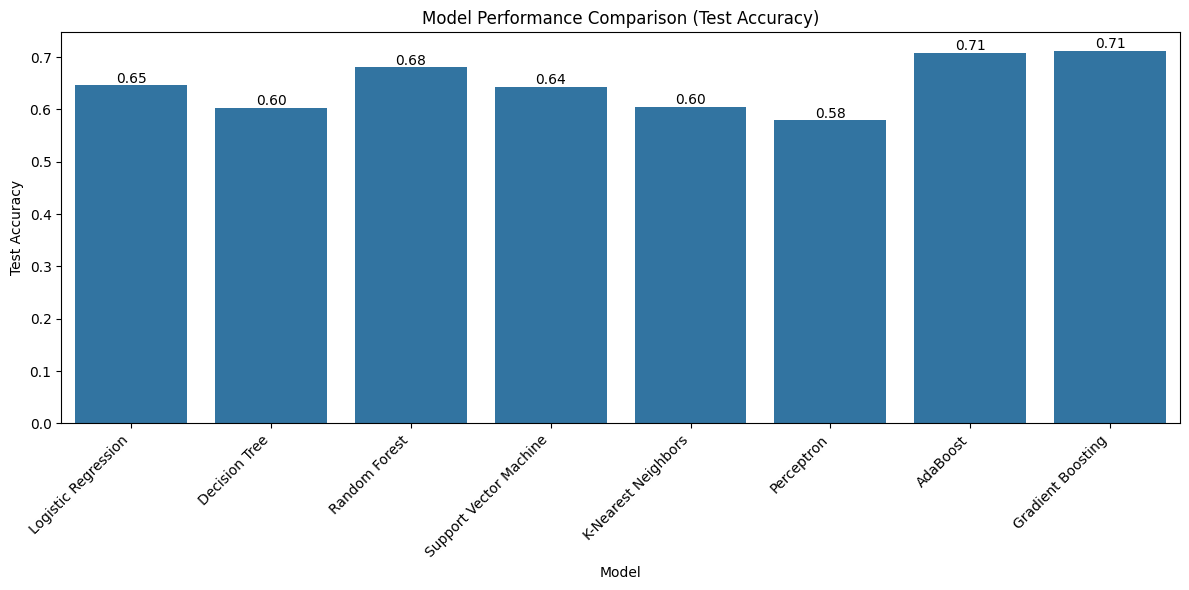

In [61]:
#   import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

def plot_model_performance(results_df):
  """Plots a comparison of test accuracy for different models.

  Args:
      results_df: A pandas DataFrame containing model performance results,
                  including 'Model' and 'Test Accuracy' columns.
  """

  plt.figure(figsize=(12, 6))
  ax = sns.barplot(x='Model', y='Test Accuracy', data=results_df)
  plt.title('Model Performance Comparison (Test Accuracy)')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Test Accuracy')

  # Add accuracy values on top of each bar
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

  plt.tight_layout()
  plt.show()

# Assuming you have a DataFrame named 'results_df' with 'Model' and 'Test Accuracy' columns
# Replace 'results_df' with your actual DataFrame variable
plot_model_performance(results_df)

In [63]:
# Your existing code here

# End time
# Your existing code here

# End time
end_time = time.time()

print("Execution time:", end_time - start_time, "seconds")


Execution time: 1405.1001467704773 seconds
